In [1]:
import os
os.sys.path

['',
 'C:\\Users\\Sander Blomme\\Anaconda\\python36.zip',
 'C:\\Users\\Sander Blomme\\Anaconda\\DLLs',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib',
 'C:\\Users\\Sander Blomme\\Anaconda',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages\\win32',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Sander Blomme\\.ipython']

In [2]:
# standard packages used to handle files
import sys
import os 
import glob
import time

# commonly used library for data manipilation
import pandas as pd

# numerical
import numpy as np

# handle images - opencv
import cv2

# machine learning library
import sklearn
import sklearn.preprocessing


#used to serialize python objects to disk and load them back to memory
import pickle

#plotting
import matplotlib.pyplot as plt

# helper functions kindly provided for you by Matthias 
import helpers
# specific helper functions for feature extraction
import features

import random

# tell matplotlib that we plot in a notebook
%matplotlib notebook


# filepath constants
DATA_BASE_PATH = 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data'
OUTPUT_PATH = 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\Output'

DATA_TRAIN_PATH = os.path.join(DATA_BASE_PATH,'train')
DATA_TEST_PATH = os.path.join(DATA_BASE_PATH,'test')

FEATURE_BASE_PATH = os.path.join(OUTPUT_PATH,'features')
FEATURE_TRAIN_PATH = os.path.join(FEATURE_BASE_PATH,'train')
FEATURE_TEST_PATH = os.path.join(FEATURE_BASE_PATH,'test')

PREDICTION_PATH = os.path.join(OUTPUT_PATH,'predictions')

# filepatterns to write out features
FILEPATTERN_DESCRIPTOR_TRAIN = os.path.join(FEATURE_TRAIN_PATH,'train_features_{}.pkl')
FILEPATTERN_DESCRIPTOR_TEST = os.path.join(FEATURE_TEST_PATH,'test_features_{}.pkl')

# create paths in case they don't exist:
helpers.createPath(FEATURE_BASE_PATH)
helpers.createPath(FEATURE_TRAIN_PATH)
helpers.createPath(FEATURE_TEST_PATH)
helpers.createPath(PREDICTION_PATH)
helpers.createPath(DATA_TEST_PATH)
helpers.createPath(DATA_TRAIN_PATH)



In [3]:
"""Self defined functions for data analysis"""
def getAmountOfPhotosPerClass(labels, paths):
    amountOfPicturesPerClass = {}
    for label in labels:
        amountOfPicturesPerClass[label] = len(paths[label])
    
    return amountOfPicturesPerClass

#calculate average number of images with labels a list of labels you want
def avgAmountOfImagesForCertainClasses(labels, paths):
    amountOfPicturesPerClass = {}
    for label in labels:
        amountOfPicturesPerClass[label] = len(paths[label])
    
    totalphotos = 0
    for label in labels:
        totalphotos = totalphotos + amountOfPicturesPerClass[label]
    
    avgOfAllClasses = (totalphotos/len(labels))
    
    return avgOfAllClasses
    
def showAmountOfPicturesAvailalbeForTrainingPerClass(labels,paths):
    d = getAmountOfPhotosPerClass(labels,paths)
    
    height = []
    for i in d.values():
        height.append(i)
    
    bars = []
    for i in d.keys():
        bars.append(i)
    
    y_pos = np.arange(len(bars))
    # Create horizontal bars
    plt.barh(y_pos, height)
    # Create names on the y-axis
    plt.yticks(y_pos, bars)
    titlepar = {'weight' : 'bold',
            'size' : '15'}
    plt.title("Amount of pictures availalbe for training per class", **titlepar)
    yLabelPar = {'rotation' : '0',
                 'weight' : 'bold'}
    yLabel = plt.ylabel("Class", **yLabelPar)
    plt.xlabel("Amount of pictures").set_weight('bold')
    for i, v in enumerate(height):
        plt.text(v + 2.5, i - 0.2, str(v), color='black',  fontweight='bold')
    # Show graphic
    plt.show()

def getImageShape(labels, paths):
    shapes = []
    for label in labels:
        for path in paths[label]:
            image  = cv2.imread(path)
            shapes.append(image.shape)
    return shapes

def getAmountOfPixels(labels, paths):
    shapes = getImageShape(labels, paths)
    pixels=[]
    for shape in shapes:
        pixels.append(shape[0]*shape[1])
    return pixels

def showAmountOfPicturesPerPixelSizeCategory(labels,paths):
    #shapes = getImageShape(labels,paths)
    #sizes  = getImageSize(labels,paths)
    pixels = getAmountOfPixels(labels,paths)
    pixelsSorted = np.sort(pixels)
    pixelsSortedSmall = pixelsSorted/1000
    pixelsSortedSmallRound = np.round(pixelsSortedSmall, 0)
    
    AmountOfPhotosPerPixelSize = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}
    for p in pixelsSortedSmallRound:
        if(p>=np.min(pixelsSortedSmallRound) and p<=500):
            AmountOfPhotosPerPixelSize[1] = AmountOfPhotosPerPixelSize[1]+1
        elif(p>500 and p<=1000):
            AmountOfPhotosPerPixelSize[2] = AmountOfPhotosPerPixelSize[2]+1
        elif(p>1000 and p<=1500):
            AmountOfPhotosPerPixelSize[3] = AmountOfPhotosPerPixelSize[3]+1
        elif(p>1500 and p<=2000):
            AmountOfPhotosPerPixelSize[4] = AmountOfPhotosPerPixelSize[4]+1
        elif(p>2000 and p<=2500):
            AmountOfPhotosPerPixelSize[5] = AmountOfPhotosPerPixelSize[5]+1
        elif(p>2500 and p<=3000):
            AmountOfPhotosPerPixelSize[6] = AmountOfPhotosPerPixelSize[6]+1
        elif(p>3000 and p<=np.max(pixelsSortedSmallRound)):
            AmountOfPhotosPerPixelSize[7] = AmountOfPhotosPerPixelSize[7]+1
             
    heightPixel = []
    for i in AmountOfPhotosPerPixelSize.values():
        heightPixel.append(i)
    
    s = 0
    for i in range(len(heightPixel)):
        s = s+heightPixel[i]
    
    heightPixelPercentage = []
    for i in range(len(heightPixel)):
        heightPixelPercentage.append((round(((heightPixel[i])/s), 4)*100))
    
    barsPixel = ["0-500","501-1000","1001-1500","1501-2000","2001-2500","2501-3000","3000-..."]
    
    y_pos = np.arange(len(barsPixel))
    # Create horizontal bars
    plt.barh(y_pos, heightPixel)
    
    # Create names on the y-axis
    plt.yticks(y_pos, barsPixel)
    titlepar = {'weight' : 'bold',
            'size' : '15'}
    plt.title("Amount of pictures per pixel size category", **titlepar)
    yLabelPar = {'rotation' : '0',
                 'weight' : 'bold'}
    plt.ylabel("Pixelsize category", **yLabelPar).set_position([-1.02, 1])
    plt.xlabel("Amount of pictures").set_weight('bold')
    
    for i, v in enumerate(heightPixelPercentage):
        plt.text(v + 2, i - 0.1, str(str(v) + "%"), color='black',  fontweight='bold')
    # Show graphic
    plt.show()

def getTotalAmountOfImagesInCertainClasses(labels, paths):
    amount = 0
    a = getAmountOfPhotosPerClass(labels, paths)
    for label in labels:
        amount = amount + a[label]
    return amount

In [4]:
folder_paths=glob.glob(os.path.join(DATA_TRAIN_PATH,'*'))
label_strings = np.sort(np.array([os.path.basename(path) for path in folder_paths]))
num_classes = label_strings.shape[0]
print(label_strings)


['bobcat' 'chihuahua' 'collie' 'dalmatian' 'german_shepherd' 'leopard'
 'lion' 'persian_cat' 'siamese_cat' 'tiger' 'wolf']


In [5]:
train_paths = dict((label_string, helpers.getImgPaths(os.path.join(DATA_TRAIN_PATH,label_string))) for label_string in label_strings)
test_paths = helpers.getImgPaths(DATA_TEST_PATH)
print(test_paths)

['E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_0001.jpg'
 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_0002.jpg'
 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_0003.jpg'
 ...
 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_3548.jpg'
 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_3549.jpg'
 'E:\\Allerlei\\Sander\\Andere\\School\\Universiteit\\Master\\Machine Learning\\Competition\\Phase 2\\Data\\test\\test_3550.jpg']


In [6]:
# add all features which you would like computed and their callbacks to this dictionary
# features where a pickle file already exists will not be recomputed
descriptor_dict={'daisy':features.extractDAISYCallback, # SIFT replacement, very fast, can be computed dense if necessary
                 'orb':features.extractORBCallback, # another fast SIFT replacement, oriented BRIEF w. FAST keypoints  
                 'freak':features.extractFREAKCallback, # biologically motivated descriptor
                 'lucid':features.extractLUCIDCallback,  
                 'vgg':features.extractVGGCallback, # Trained as proposed by VGG lab, don't confuse it with VGG-Net features
                 'boost_desc':features.extractBoostDescCallback, # Image descriptor learned with boosting
                'surf': features.extractSURFCallback} 
                 
if features.checkForSIFT():
    descriptor_dict['sift'] = features.extractSIFTCallback # One descriptor to rule them all, unfortunately patented


In [7]:
"""extract train features and create pickle files of them"""
train_descriptor_dict = descriptor_dict.copy()

# if the corresponding files already exist, do not extract them again
train_descriptor_dict = dict((key,value) for (key,value) in descriptor_dict.items() if not os.path.isfile(FILEPATTERN_DESCRIPTOR_TRAIN.format(key)))

if len(train_descriptor_dict) > 0: 

    train_features = []
    train_labels = []
    
    # convert train images
    train_features_by_descriptor = dict((key,[]) for (key,value) in train_descriptor_dict.items())
    
    for label_string in label_strings:
        print('extracting train features for class {} :'.format(label_string))

        extracted_features = features.extractFeatures(train_paths[label_string],train_descriptor_dict, label_string)

        # append descriptors of corresponding label to correct descriptor list 
        for key in train_features_by_descriptor.keys():
            train_features_by_descriptor[key]+=extracted_features[key]
  
    for descriptor_key in train_features_by_descriptor.keys():
        with open(FILEPATTERN_DESCRIPTOR_TRAIN.format(descriptor_key),'wb') as pkl_file_train:
            pickle.dump(train_features_by_descriptor[descriptor_key], pkl_file_train, protocol=pickle.HIGHEST_PROTOCOL)
    

extracting train features for class bobcat :


100%|██████████| 315/315 [01:28<00:00,  3.33it/s]


extracting train features for class chihuahua :


100%|██████████| 197/197 [00:37<00:00,  4.42it/s]


extracting train features for class collie :


100%|██████████| 458/458 [01:57<00:00,  3.77it/s]


extracting train features for class dalmatian :


100%|██████████| 81/81 [00:22<00:00,  3.70it/s]


extracting train features for class german_shepherd :


100%|██████████| 517/517 [02:14<00:00,  5.35it/s]


extracting train features for class leopard :


100%|██████████| 360/360 [01:48<00:00,  3.40it/s]


extracting train features for class lion :


100%|██████████| 510/510 [02:23<00:00,  3.76it/s]


extracting train features for class persian_cat :


100%|██████████| 374/374 [01:13<00:00,  5.08it/s]


extracting train features for class siamese_cat :


100%|██████████| 250/250 [00:49<00:00,  4.22it/s]


extracting train features for class tiger :


100%|██████████| 439/439 [02:12<00:00,  4.92it/s]


extracting train features for class wolf :


100%|██████████| 55/55 [00:15<00:00,  3.88it/s]


In [9]:
"""extract test features and create pickle files of them"""
test_pathsAug = helpers.getImgPaths(DATA_TEST_PATH)

test_descriptor_dict=dict((key,value) for (key,value) in descriptor_dict.items() if not os.path.isfile(FILEPATTERN_DESCRIPTOR_TEST.format(key)))

if len(test_descriptor_dict) > 0: 
    test_features = []
    
    print('extracting test features:') 
    
    test_features_by_descriptor = features.extractFeatures(test_paths,test_descriptor_dict, None) 
    
    for descriptor_key in test_features_by_descriptor.keys():
        with open(FILEPATTERN_DESCRIPTOR_TEST.format(descriptor_key),'wb') as pkl_file_test:
            pickle.dump(test_features_by_descriptor[descriptor_key], pkl_file_test, protocol=pickle.HIGHEST_PROTOCOL)


extracting test features:


100%|██████████| 3550/3550 [15:32<00:00,  2.59it/s]


In [7]:
"""function that extract all features (train & test) from pickle files and saves them into 3 lists: train_data, trian_labels and test_data"""
def get_features(feature_name, codebook_size,seed):

    with open(FILEPATTERN_DESCRIPTOR_TRAIN.format(feature_name),'rb') as pkl_file_train:
        train_features_from_pkl=pickle.load(pkl_file_train)

        print('Number of encoded train images:' + str(len(train_features_from_pkl)))

    with open(FILEPATTERN_DESCRIPTOR_TEST.format(feature_name),'rb') as pkl_file_test:
        test_features_from_pkl = pickle.load(pkl_file_test)

        print('Number of encoded test images:' + str(len(test_features_from_pkl)))

    clustered_codebook = helpers.createCodebook(train_features_from_pkl, codebook_size = codebook_size)

    # encode all train images 
    train_data=[]
    train_labels=[]

    random.seed(seed)
    random.shuffle(train_features_from_pkl)

    for image_features in train_features_from_pkl:
        bow_feature_vector = helpers.encodeImage(image_features.data,clustered_codebook)
        train_data.append(bow_feature_vector)
        train_labels.append(image_features.label)
        
        # use a labelencoder to obtain numerical labels
    label_encoder = sklearn.preprocessing.LabelEncoder()
    label_encoder.fit(label_strings)
    train_labels = label_encoder.transform(train_labels)
        
        # encode all test images 
    test_data=[]
    for image_features in test_features_from_pkl:
        bow_feature_vector=helpers.encodeImage(image_features.data,clustered_codebook)
        test_data.append(bow_feature_vector)
    print("ready")
    return train_data,train_labels,test_data


In [9]:
"""get features for each descriptor"""
train_data_sift,train_labels_sift,test_data_sift = get_features('sift',700,seed=123456)
train_data_freak,train_labels_freak,test_data_freak = get_features('freak',1000,seed=123456)
train_data_daisy,train_labels_daisy,test_data_daisy = get_features('daisy',1100,seed=123456)
train_data_lucid,train_labels_lucid,test_data_lucid = get_features('lucid',1000,seed=123456)
train_data_orb,train_labels_orb,test_data_orb = get_features('orb',1000,seed=123456)
train_data_vgg,train_labels_vgg,test_data_vgg = get_features('vgg',900,seed=123456)
train_data_boost_desc,train_labels_boost_desc,test_data_boost_desc = get_features('boost_desc',900,seed=123456)
train_data_surf,train_labels_surf,test_data_surf = get_features('surf',700,seed=123456)

Number of encoded train images:3556
Number of encoded test images:3550
training took 62.14304327964783 seconds
ready
Number of encoded train images:3556
Number of encoded test images:3550
training took 62.389859676361084 seconds
ready
Number of encoded train images:3556
Number of encoded test images:3550
training took 112.12256145477295 seconds
ready
Number of encoded train images:3556
Number of encoded test images:3550
training took 56.17578744888306 seconds
ready
Number of encoded train images:3556
Number of encoded test images:3550
training took 78.43091988563538 seconds
ready
Number of encoded train images:3556
Number of encoded test images:3550
training took 60.303285360336304 seconds
ready
Number of encoded train images:3556
Number of encoded test images:3550
training took 45.98498797416687 seconds
ready
Number of encoded train images:3556
Number of encoded test images:3550
training took 423.57866883277893 seconds
ready


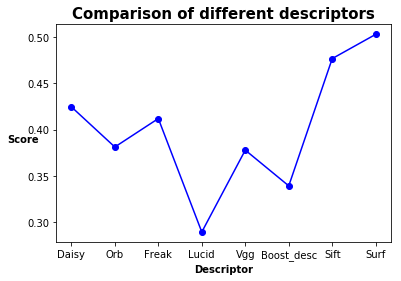

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
scoring= "accuracy"
"""See which descriptor might be most suitable with basic LogisticRegression"""
descriptorNames = ["Daisy", "Orb", "Freak", "Lucid", "Vgg", "Boost_desc", "Sift", "Surf"]
trainDataPerName = {}
trainDataPerName["Daisy"] = train_data_daisy
trainDataPerName["Orb"] = train_data_orb
trainDataPerName["Freak"] = train_data_freak
trainDataPerName["Lucid"] = train_data_lucid
trainDataPerName["Vgg"] = train_data_vgg
trainDataPerName["Boost_desc"] = train_data_boost_desc
trainDataPerName["Sift"] = train_data_sift
trainDataPerName["Surf"] = train_data_surf

trainLabelsPerName = {}
trainLabelsPerName["Daisy"] = train_labels_daisy
trainLabelsPerName["Orb"] = train_labels_orb
trainLabelsPerName["Freak"] = train_labels_freak
trainLabelsPerName["Lucid"] = train_labels_lucid
trainLabelsPerName["Vgg"] = train_labels_vgg
trainLabelsPerName["Boost_desc"] = train_labels_boost_desc
trainLabelsPerName["Sift"] = train_labels_sift
trainLabelsPerName["Surf"] = train_labels_surf

result = []
kfold = KFold(n_splits=10, random_state=7)
for key in trainDataPerName.keys():
    result.append(cross_val_score(LogisticRegression(), trainDataPerName[key], trainLabelsPerName[key], cv=kfold, scoring=scoring).mean())

plt.figure()
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0',}
xpara = {'weight' : 'bold'}
plt.title("Comparison of different descriptors",**titlepar)
plt.xlabel("Descriptor", **xpara)
plt.ylabel("Score", **ypara).set_position([-1, 0.45])
plt.plot(descriptorNames, result, 'o-', color="b")
plt.show()

In [10]:
train_data = []
test_data = []
train_labels = train_labels_freak
for i in range(len(train_data_freak)):
    train_data.append(list(train_data_sift[i]) + list(train_data_freak[i]) + list(train_data_daisy[i]) + list(train_data_lucid[i]) + list(train_data_orb[i]) + list(train_data_vgg[i]) + list(train_data_boost_desc[i]) + list(train_data_surf[i]))

for i in range(len(test_data_freak)):
    test_data.append(list(test_data_sift[i]) + list(test_data_freak[i]) + list(test_data_daisy[i]) + list(test_data_lucid[i]) + list(test_data_orb[i]) + list(test_data_vgg[i]) + list(test_data_boost_desc[i]) + list(test_data_surf[i]))


In [11]:
"""split training data into pure training and validation data"""
local_testing = True

offline_test_data = []
offline_test_labels = []
X_all = train_data
y_all = train_labels

if local_testing:
    from sklearn.model_selection import train_test_split
    train_data, offline_test_data, train_labels, offline_test_labels = train_test_split(train_data, train_labels, test_size=0.3)

print("ready")

ready


In [12]:
X = train_data
y = train_labels
if local_testing:
    X_test = offline_test_data
    y_test = offline_test_labels

In [13]:
"""create a SVC model"""
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0, probability=True)
print("ready")

ready


In [14]:
"""fit the model with the extracted training data"""
clf.fit(X,y)
print("ready")

ready


In [15]:
"""Tune regularization parameter C"""
from sklearn.model_selection import GridSearchCV, KFold
clf.get_params(deep=True)
CvaluesToTest = [1.0e-1,1.0,2.0,5.0]
tuned_parameters = [{'C': CvaluesToTest}]
kfold10 = KFold(n_splits=10, random_state=7)
CV = GridSearchCV(clf, tuned_parameters, cv=kfold10)
CV.fit(X, y)

print("Best parameter set found on development set: ",CV.best_params_)
# store the best optimization parameter for later reuse
bestC2 = CV.best_params_['C']

print("Grid scores on training data set:")
print()
cv_means = CV.cv_results_['mean_test_score']
cv_stds = CV.cv_results_['std_test_score']
for mean, std, params in zip(cv_means, cv_stds, CV.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
       
plt.figure()
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0',}
xpara = {'weight' : 'bold'}
plt.title("Tune regularization parameter",**titlepar)
plt.xlabel("Value of regularization parameter C", **xpara)
plt.ylabel("Score", **ypara)
plt.plot()
plt.plot(CvaluesToTest)
plt.show()

#We'll take the default value of C=1

KeyboardInterrupt: 

2
5
10


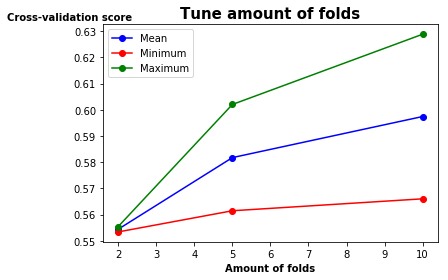

In [20]:
"""Optimize amount of folds"""
from sklearn.model_selection import cross_val_score, KFold
scoring = 'accuracy'
foldsizes = [2, 5, 10]
dMean = {}
dStd = {}
names = []
results = []
for foldSize in foldsizes:
    kfold = KFold(n_splits=foldSize, random_state=7)
    cv_results = cross_val_score(clf, X, y, cv=kfold, scoring=scoring)   
    dMean[foldSize] = cv_results.mean()
    dStd[foldSize] = cv_results.std()
    results.append(cv_results)
    names.append(foldSize)
    print(foldSize)
    
minScore = {}
maxScore = {}
for key in dMean.keys():
    minScore[key] = dMean[key] - dStd[key]
    maxScore[key] = dMean[key] + dStd[key]

plt.figure()
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0'}
xpara = {'weight' : 'bold'}
plt.title("Tune amount of folds",**titlepar)
plt.xlabel("Amount of folds", **xpara)
plt.ylabel("Cross-validation score", **ypara).set_position([-1.5, 1.01])
plt.plot(dMean.keys(), dMean.values(), 'o-', color="b",label="Mean")
plt.plot(dMean.keys(), minScore.values(), 'o-', color="r",label="Minimum")
plt.plot(dMean.keys(), maxScore.values(), 'o-', color="g",label="Maximum")
plt.legend(loc="best")
plt.show()

#We'll take the number of folds equal to 10.

In [16]:
print("a")

a


In [33]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

if local_testing:
    y_pred = clf.predict_proba(np.array(X_test))
    y_pred_abs = clf.predict(np.array(X_test))
    
    print(sklearn.metrics.log_loss(y_test,y_pred))  #1.1509491197934199
    print(confusion_matrix(y_test,y_pred_abs))
    """[[ 51   1   6   0  12   1  11   4   1   5   0]
         [  1   5   6   0  12   0   2   7   7   1   0]
         [  3   8  63   0  39   1   7   5   3   7   0]
         [  1   1   4  16   2   0   1   1   0   0   0]
         [  6  10  26   0  75   2  14   7   5   5   0]
         [  4   0   1   0   0 101   2   0   0   1   0]
         [ 10   0  16   0  16   0 111   1   1   2   0]
         [  4   5   7   0  20   2   3  65  10   0   0]
         [  0  13   2   0  14   0   1  18  37   1   0]
         [  8   0   6   0   4   1   8   4   0 106   0]
         [  4   0   4   0   2   0   5   1   1   0   0]]
         """
    print(classification_report(y_test,y_pred_abs))
"""             precision    recall  f1-score   support

          0       0.55      0.55      0.55        92
          1       0.12      0.12      0.12        41
          2       0.45      0.46      0.45       136
          3       1.00      0.62      0.76        26
          4       0.38      0.50      0.43       150
          5       0.94      0.93      0.93       109
          6       0.67      0.71      0.69       157
          7       0.58      0.56      0.57       116
          8       0.57      0.43      0.49        86
          9       0.83      0.77      0.80       137
         10       0.00      0.00      0.00        17

avg / total       0.60      0.59      0.59      1067
"""

1.1509491197934199
[[ 51   1   6   0  12   1  11   4   1   5   0]
 [  1   5   6   0  12   0   2   7   7   1   0]
 [  3   8  63   0  39   1   7   5   3   7   0]
 [  1   1   4  16   2   0   1   1   0   0   0]
 [  6  10  26   0  75   2  14   7   5   5   0]
 [  4   0   1   0   0 101   2   0   0   1   0]
 [ 10   0  16   0  16   0 111   1   1   2   0]
 [  4   5   7   0  20   2   3  65  10   0   0]
 [  0  13   2   0  14   0   1  18  37   1   0]
 [  8   0   6   0   4   1   8   4   0 106   0]
 [  4   0   4   0   2   0   5   1   1   0   0]]


C:\Users\Sander Blomme\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.55      0.55      0.55        92
          1       0.12      0.12      0.12        41
          2       0.45      0.46      0.45       136
          3       1.00      0.62      0.76        26
          4       0.38      0.50      0.43       150
          5       0.94      0.93      0.93       109
          6       0.67      0.71      0.69       157
          7       0.58      0.56      0.57       116
          8       0.57      0.43      0.49        86
          9       0.83      0.77      0.80       137
         10       0.00      0.00      0.00        17

avg / total       0.60      0.59      0.59      1067



'             precision    recall  f1-score   support\n\n          0       0.52      0.55      0.54        97\n          1       0.41      0.24      0.30        63\n          2       0.43      0.49      0.46       142\n          3       1.00      0.56      0.71        18\n          4       0.45      0.52      0.48       159\n          5       0.95      0.87      0.91       102\n          6       0.68      0.75      0.71       154\n          7       0.54      0.53      0.54       113\n          8       0.50      0.48      0.49        73\n          9       0.84      0.81      0.82       134\n         10       0.00      0.00      0.00        12\n\navg / total       0.60      0.60      0.59      1067\n'

[[0.13464128 0.01802506 0.01939347 ... 0.041441   0.25816696 0.01127799]
 [0.0268241  0.04167933 0.07085785 ... 0.01820865 0.01787945 0.00176335]
 [0.16605413 0.0577377  0.15153938 ... 0.04803541 0.02770972 0.05531515]
 ...
 [0.06270194 0.03077301 0.12650579 ... 0.01239926 0.06658391 0.03507084]
 [0.01117262 0.01159628 0.01754768 ... 0.0250749  0.00349593 0.00690896]
 [0.0028149  0.00369325 0.00458006 ... 0.00136939 0.00541396 0.00231561]]
[[0.14630516 0.01895991 0.0205787  ... 0.04415802 0.25006299 0.01220265]
 [0.02668118 0.0398647  0.07139141 ... 0.01797866 0.0188978  0.00187194]
 [0.15924357 0.06039581 0.15902537 ... 0.04586584 0.02792287 0.05662323]
 ...
 [0.05651127 0.03933874 0.12983048 ... 0.01254201 0.06477052 0.03292499]
 [0.01289754 0.01170104 0.01684416 ... 0.02692095 0.00381185 0.00793439]
 [0.00438187 0.0064781  0.00488213 ... 0.00167661 0.00742466 0.00332424]]


b


In [19]:
"""Plot ROC"""
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
kfold10 = KFold(n_splits=10)
def plotROC(x, y, nameofTest, test, cv):
    y_bin = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9,10])
    n_classes = y_bin.shape[1]
    
    pipeline= Pipeline([('scaler', StandardScaler()), (nameofTest, test)])
    y_score = cross_val_predict(pipeline, x, y, cv=cv ,method='predict_proba')
    f = dict()
    t = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        f[i], t[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(f[i], t[i])
    colors =(['blue', 'red', 'green','yellow', 'black','coral','orange','cyan','peachpuff','deeppink','forestgreen'])
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(f[i], t[i], color=color, lw=3,
                 label='ROC curve of class {0} (AUC = {1:0.2f})'
                 ''.format(label_strings[i], roc_auc[i]))
        
    plt.plot([0, 1], [0, 1], 'k--', lw=3)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    titlepar = {'weight' : 'bold',
            'size' : '15'}
    ypara = {'weight' : 'bold',
             'rotation' : '0',}
    xpara = {'weight' : 'bold'}
    plt.xlabel('False Positive Rate', **xpara)
    plt.ylabel('True Positive \n Rate', **ypara).set_position([-1, 0.43])
    plt.title('ROC for image classification', **titlepar)
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.show()

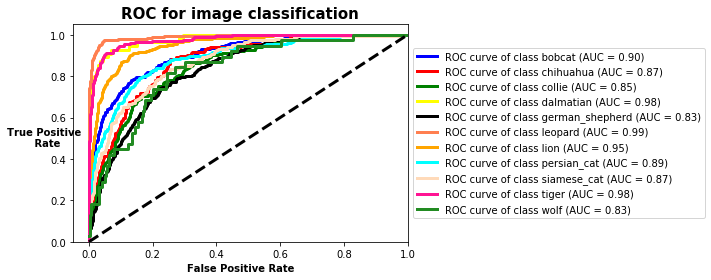

In [20]:
kfold10 = KFold(n_splits=10)
plotROC(X, y, "Linear SVM, standard dataset", clf, kfold10)

In [21]:
"""Plot learning curve for accuracy"""
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve_accuracy(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    if ylim is not None:
        plt.ylim(*ylim)
    titlepar = {'weight' : 'bold',
            'size' : '15'}
    ypara = {'weight' : 'bold',
             'rotation' : '0'}
    xpara = {'weight' : 'bold'}
    plt.title(title, **titlepar)
    plt.xlabel("Number of training images", **xpara)
    plt.ylabel("Accuracy", **ypara).set_position([-1.5, 0.45])
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.errorbar(train_sizes, train_scores_mean, yerr=train_scores_std, color = 'r', ecolor = 'r')
    plt.errorbar(train_sizes, test_scores_mean, yerr=test_scores_std, color = 'g', 
                 ecolor = 'g')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross validation score")
    plt.legend(loc="best")
    return plt



<module 'matplotlib.pyplot' from 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

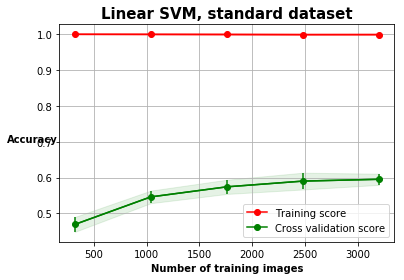

In [22]:
kfold10 = KFold(n_splits=10)
plot_learning_curve_accuracy(clf, "Linear SVM, standard dataset", X_all, y_all, ylim=None, cv=kfold10, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))

ids: 0
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 1
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 2
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 3
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 4
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 5
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 6
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 7
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9


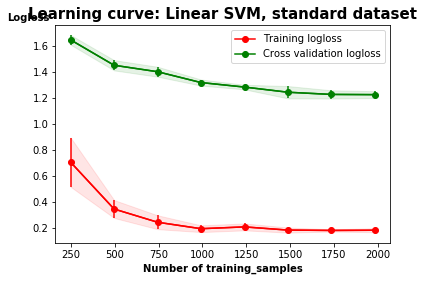

In [40]:
total_samples = len(train_data)
train_samples = np.arange(start=total_samples//10,stop=4*total_samples//5+1,step=total_samples//10)
validation_samples = total_samples//5

train_errors = np.empty((len(train_samples), 10))
validation_errors = np.empty((len(train_samples), 10))

for ids in range(len(train_samples)):
    s = train_samples[ids]
    print("ids: " + str(ids))
    for idt in range(10):
        perm = np.random.permutation(total_samples)
        x_train = [train_data[i] for i in perm[:s]]
        Y_train = train_labels[perm[:s]]
        x_validation = [train_data[i] for i in perm[s:s+validation_samples]]   
        y_validation = train_labels[perm[s:s+validation_samples]]
        clf2 = svm.SVC(kernel='linear', C = 1.0, probability=True)
        clf2.fit(x_train, Y_train)
        pred_train = clf2.predict_proba(x_train)
        pred_val = clf2.predict_proba(x_validation)
        train_errors[ids,idt] = sklearn.metrics.log_loss(Y_train, pred_train)
        validation_errors[ids,idt] = sklearn.metrics.log_loss(y_validation, pred_val)
        print("idt: " + str(idt))
        
train_mean = np.mean(train_errors, axis = 1)        
validation_mean = np.mean(validation_errors, axis = 1)        
train_std = np.std(train_errors, axis = 1)        
validation_std = np.std(validation_errors, axis = 1)        

plt.figure()
plt.errorbar(train_samples, train_mean, yerr=train_std, color = 'r', ecolor = 'r')
plt.errorbar(train_samples, validation_mean, yerr=validation_std, color = 'g', 
             ecolor = 'g')
plt.grid()
plt.fill_between(train_samples, train_mean - train_std,
                 train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_samples, validation_mean - validation_std,
                 validation_mean + validation_std, alpha=0.1, color="g")
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0'}
xpara = {'weight' : 'bold'}
plt.grid()
plt.title("Learning curve: Linear SVM, standard dataset",**titlepar)
plt.xlabel("Number of training_samples", **xpara)
plt.ylabel("Logloss", **ypara).set_position([-1.5, 1.01])
plt.plot(train_samples, train_mean, 'o-', color="r",
             label="Training logloss")
plt.plot(train_samples, validation_mean, 'o-', color="g",
         label="Cross validation logloss")
plt.legend(loc="best")
plt.show()


In [41]:
"""Functions to plot confusion matrix"""
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    titlepar = {'weight' : 'bold',
            'size' : '20'}
    ypara = {'weight' : 'bold',
             'rotation' : '0',
             'size' : '14'}
    xpara = {'weight' : 'bold',
             'size' : '14'}
    plt.ylabel('True label', **ypara)
    plt.xlabel('Predicted label', **xpara)
    plt.title(title, **titlepar)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, weight='bold')
    plt.yticks(tick_marks, classes, weight = 'bold')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

def plot_confusion_matrix(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_true = y_test
    y_pred = model.predict(x_test)
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plt.figure(figsize = (20, 20))
    plot_conf_matrix(cnf_matrix, classes=label_strings,
                          title='Confusion matrix (%)')
    
    # Plot normalized confusion matrix
    plt.figure(figsize = (20, 20))
    plot_conf_matrix(cnf_matrix, classes=label_strings, normalize=True,
                          title='Normalized onfusion matrix')

Confusion matrix, without normalization
Normalized confusion matrix


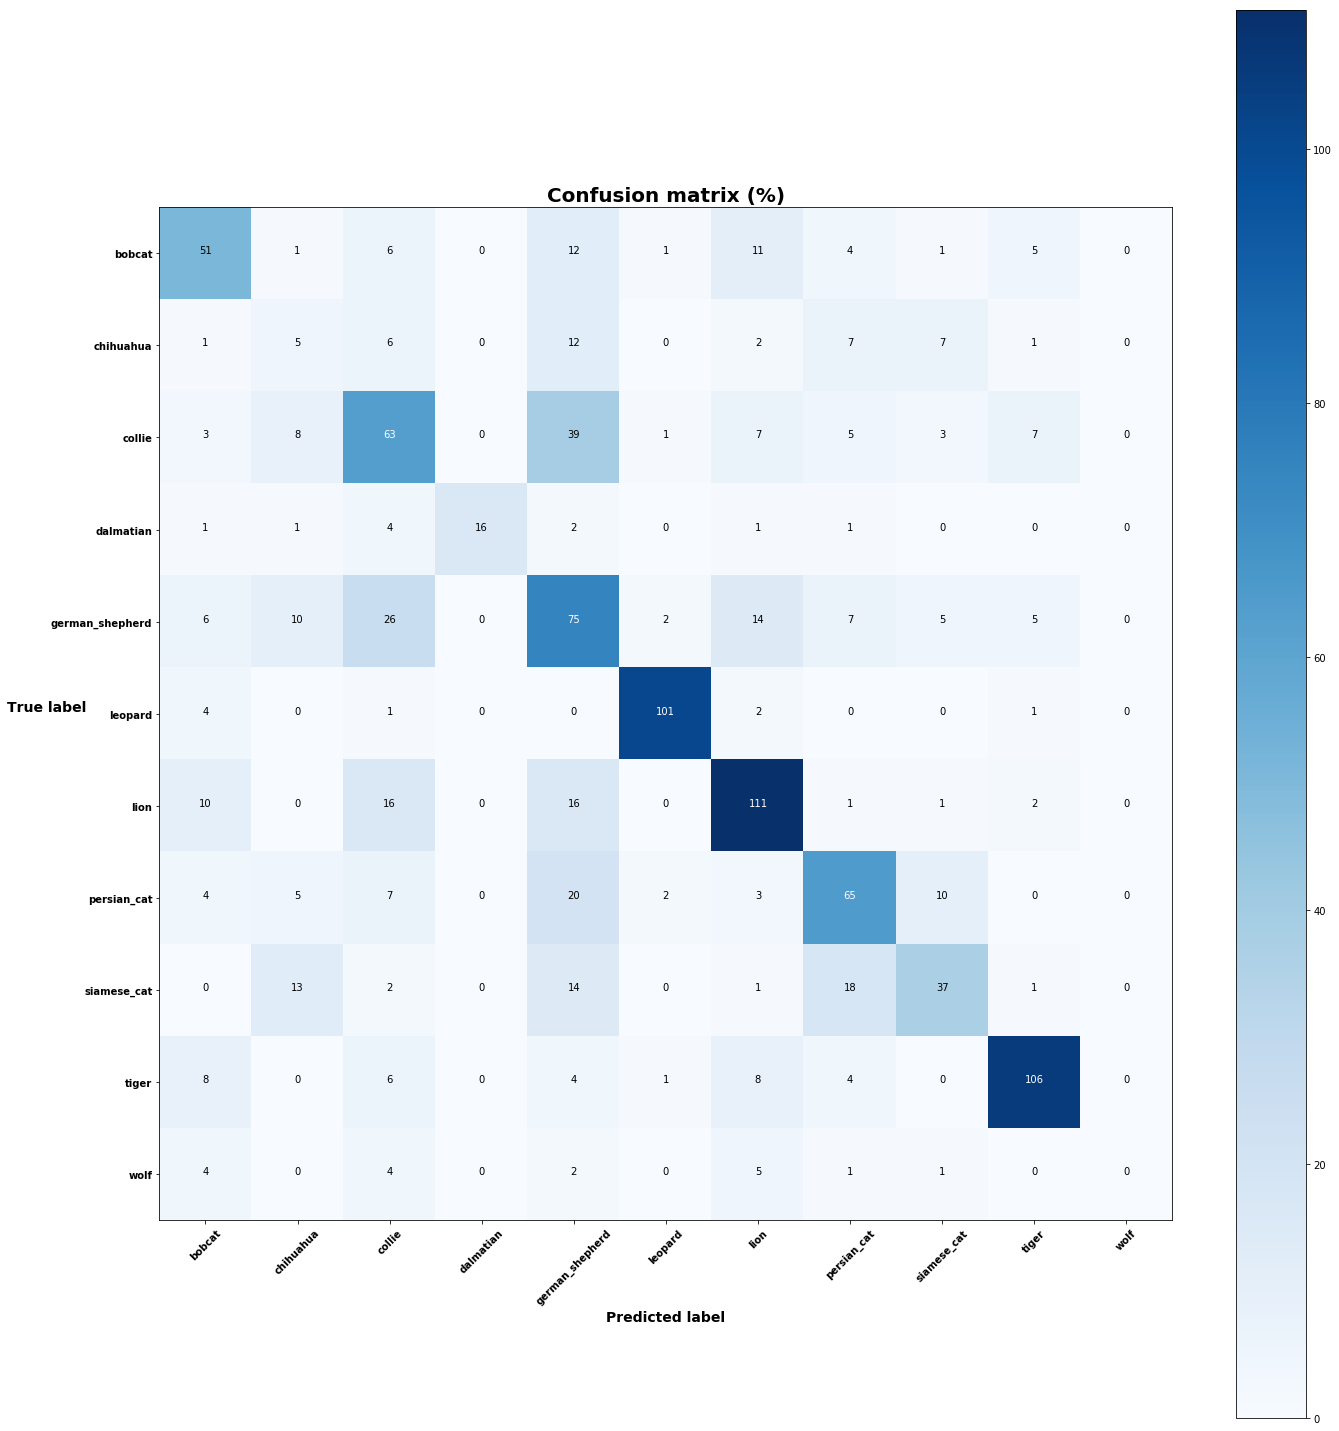

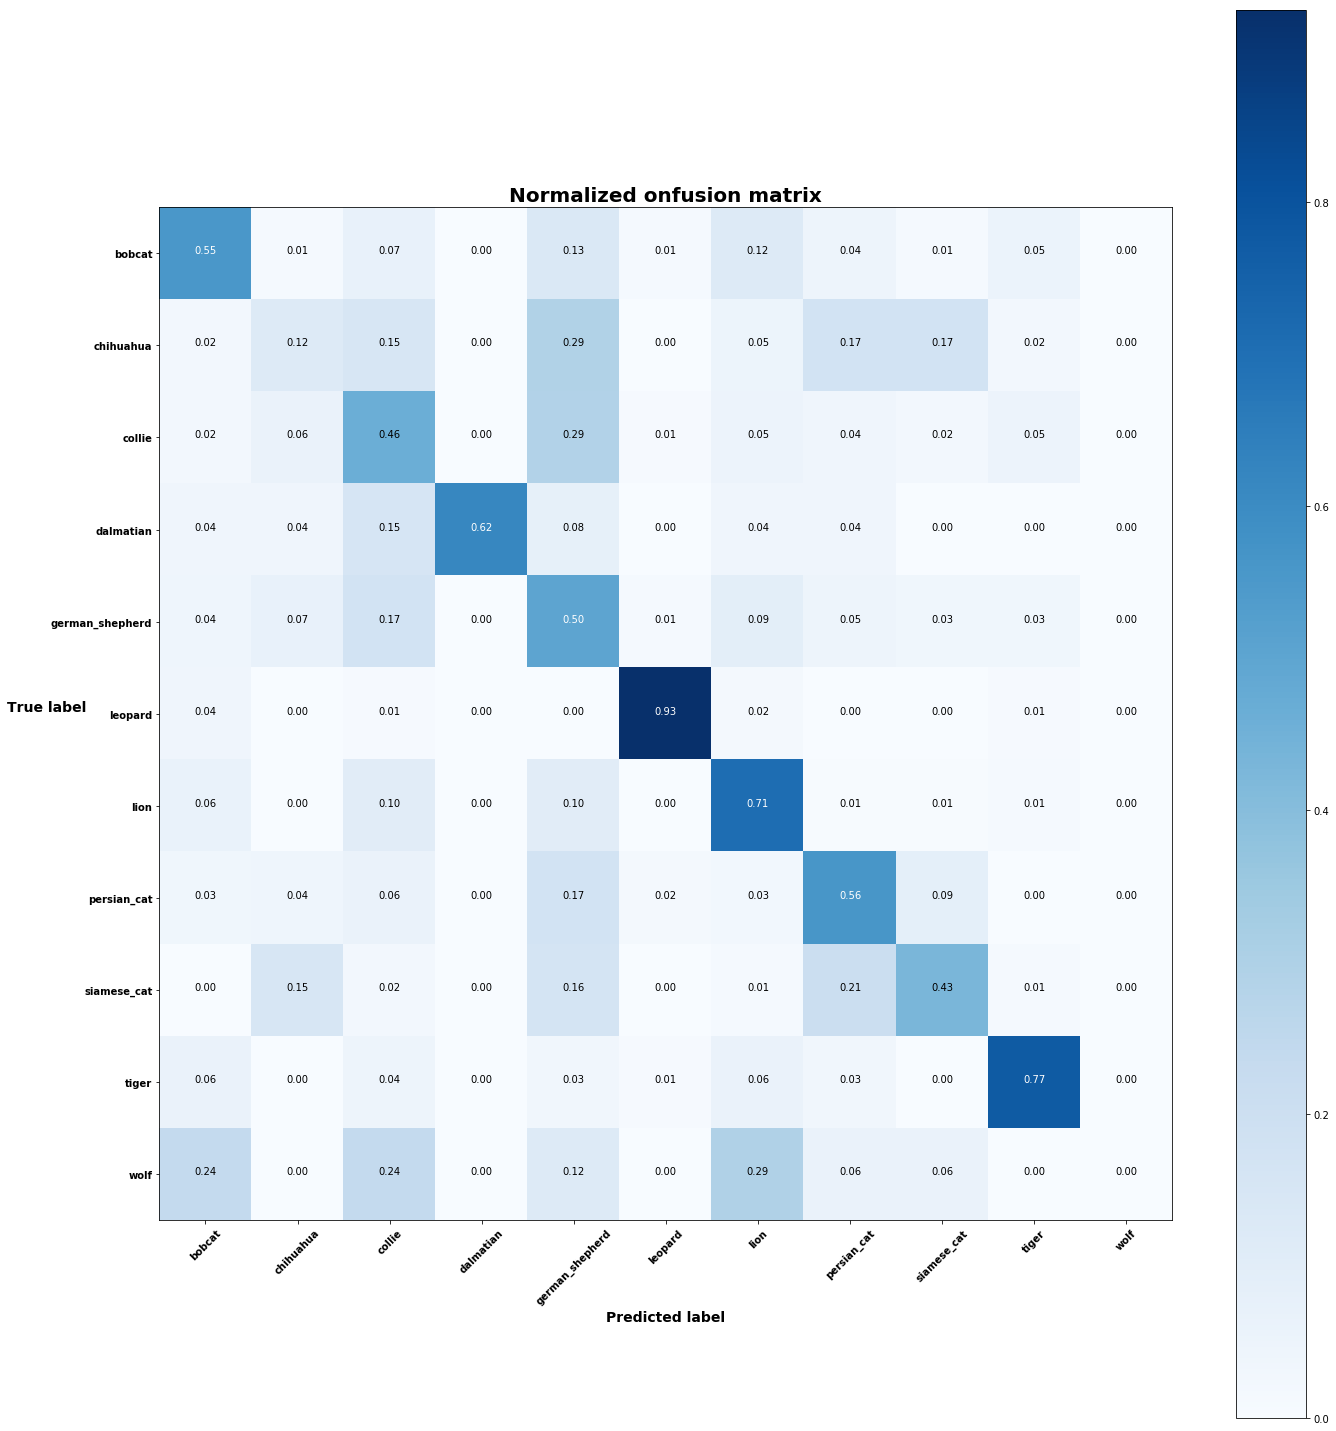

In [42]:
plot_confusion_matrix(clf, X, y, offline_test_data, offline_test_labels)

In [43]:
predictions = clf.predict_proba(np.array(test_data))
predictions = predictions.tolist()

In [44]:
# Build a submission
pred_file_path = os.path.join(PREDICTION_PATH, helpers.generateUniqueFilename('Linear SVM, standard dataset','csv'))
helpers.writePredictionsToCsv(predictions,pred_file_path,label_strings)
print("ready")

#KAGGLE:
    # 1.10413

ready


In [ ]:
"""Feature selection"""
"""Forward selection"""
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
codebook_size = 700
f = np.zeros(500)
kfold10 = KFold(n_splits=10, random_state=7)

for i in range(codebook_size):
    selector = SelectKBest(chi2, k=i+1).fit(X, y)
    x_new=selector.transform(X)
    model = clf
    f[i] = cross_val_score(model, x_new, y, cv=kfold10).mean()
    print("Average accuracy with ",i+1," features: ",f[i])

plt.figure()
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0'}
xpara = {'weight' : 'bold'}
plt.title("Forward feature selection",**titlepar)
plt.xlabel("Amount of features", **xpara)
plt.ylabel("Cross-validation score", **ypara).set_position([-1.5, 1.01])
plt.plot(np.arange(1.0,codebook_size+1,1.0),f)
plt.show()

best_features = np.argmax(f)
print("Optimal performance of ",f[best_features],
      ", for ",best_features+1," features")

featureSelector = SelectKBest(chi2, k=best_features+1).fit(X, y)
selector_modelForward = clf
selector_modelForward.fit(featureSelector.transform(X), y)
kfold10 = KFold(n_splits=10, random_state=7)
scoreslin = cross_val_score(selector_modelForward, featureSelector.transform(X), y, cv=kfold10)
print("Average CV accuracy of linear model: ",scoreslin.mean(),", stdev: ",scoreslin.std())

pred_select = selector_modelForward.predict(featureSelector.transform(X_test))

train_score_select = selector_modelForward.score(featureSelector.transform(X), y)
test_score_select = selector_modelForward.score(featureSelector.transform(x_test), y_test)

print("Accuracy of final model: ",train_score_select,
  " (train), ",test_score_select," (test)")


#We'll take 500 features/components to perform PCA

In [45]:
"""PCA"""
from sklearn.decomposition import PCA
pca = PCA(n_components = 500)
train_dataPCA = pca.fit_transform(X_all)
train_labelsPCA = y_all
print("ready")

ready


ids: 0
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 1
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 2
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 3
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 4
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 5
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 6
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 7
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9


<IPython.core.display.Javascript object>


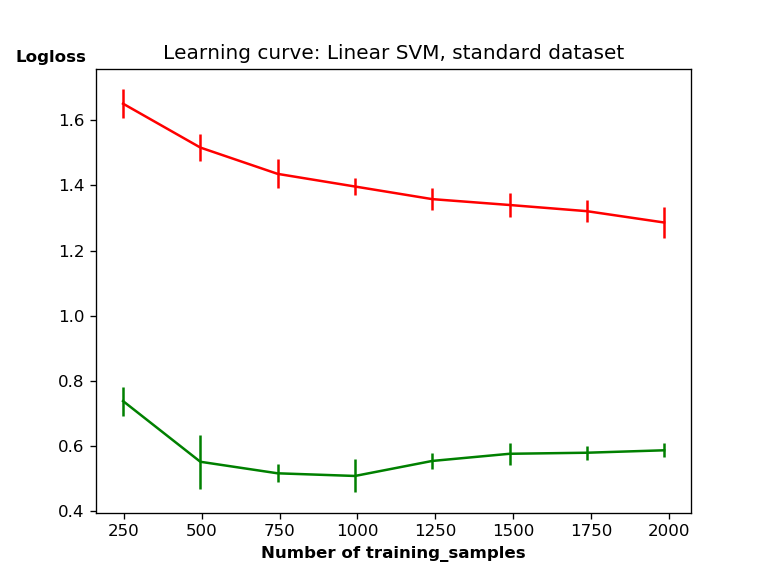

In [46]:
local_testingPCA = True

offline_test_dataPCA = []
offline_test_labelsPCA = []
X_allPCA = train_dataPCA
y_allPCA = train_labelsPCA

if local_testingPCA:
    from sklearn.model_selection import train_test_split
    x_train_dataPCA, offline_test_dataPCA, y_train_labelsPCA, offline_test_labelsPCA = train_test_split(X_allPCA, y_allPCA, test_size=0.3)

In [47]:
clfPCA = svm.SVC(kernel='linear', C = 1.0, probability=True)
clfPCA.fit(x_train_dataPCA, y_train_labelsPCA)
print("ready")

ready


<IPython.core.display.Javascript object>


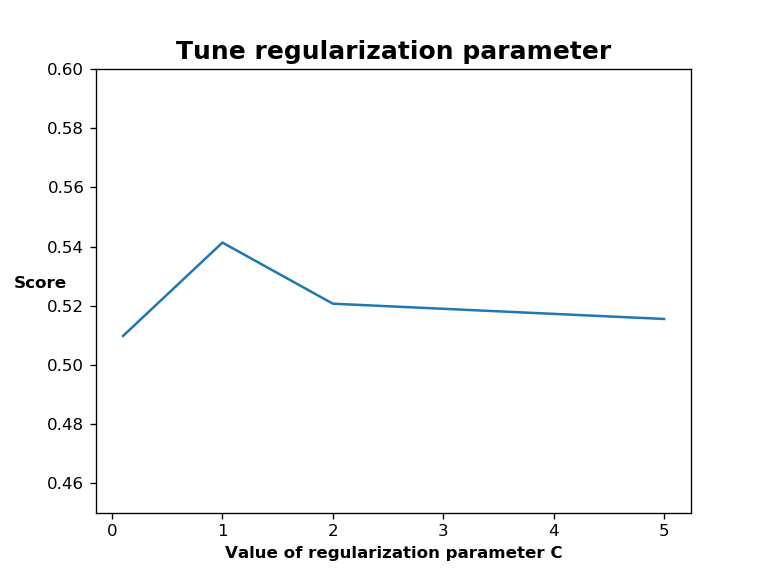

In [82]:
"""Tune regularization parameter C"""
from sklearn.model_selection import GridSearchCV, KFold
clfPCA.get_params(deep=True)
CvaluesToTest = [1.0e-1,1.0,2.0,5.0]
tuned_parameters = [{'C': CvaluesToTest}]
kfold10 = KFold(n_splits=10, random_state=7)
CV = GridSearchCV(clfPCA, tuned_parameters, cv=kfold10)
CV.fit(X, y)

print("Best parameter set found on development set: ",CV.best_params_)
# store the best optimization parameter for later reuse
bestC2 = CV.best_params_['C']

print("Grid scores on training data set:")
print()
cv_means = CV.cv_results_['mean_test_score']
cv_stds = CV.cv_results_['std_test_score']
for mean, std, params in zip(cv_means, cv_stds, CV.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
       
plt.figure()
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0',}
xpara = {'weight' : 'bold'}
plt.title("Tune regularization parameter",**titlepar)
plt.xlabel("Value of regularization parameter C", **xpara)
plt.ylabel("Score", **ypara)
plt.plot()
plt.plot(CvaluesToTest)
plt.show()

#We'll take the default value of C=1

<IPython.core.display.Javascript object>


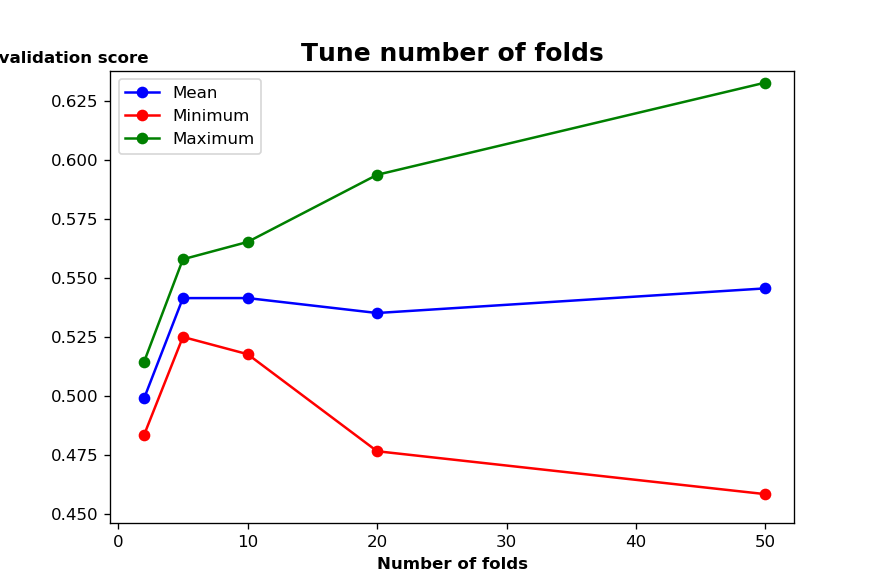

In [86]:
"""Optimize amount of folds"""
from sklearn.model_selection import cross_val_score, KFold
scoring = 'accuracy'
foldsizes = [2, 5, 10]
dMean = {}
dStd = {}
names = []
results = []
for foldSize in foldsizes:
    kfold = KFold(n_splits=foldSize, random_state=7)
    cv_results = cross_val_score(clfPCA, X_allPCA, y_allPCA, cv=kfold, scoring=scoring)   
    dMean[foldSize] = cv_results.mean()
    dStd[foldSize] = cv_results.std()
    results.append(cv_results)
    names.append(foldSize)
    print(foldSize)
    
minScore = {}
maxScore = {}
for key in dMean.keys():
    minScore[key] = dMean[key] - dStd[key]
    maxScore[key] = dMean[key] + dStd[key]

plt.figure()
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0'}
xpara = {'weight' : 'bold'}
plt.title("Tune amount of folds",**titlepar)
plt.xlabel("Amount of folds", **xpara)
plt.ylabel("Cross-validation score", **ypara).set_position([-1.5, 1.01])
plt.plot(dMean.keys(), dMean.values(), 'o-', color="b",label="Mean")
plt.plot(dMean.keys(), minScore.values(), 'o-', color="r",label="Minimum")
plt.plot(dMean.keys(), maxScore.values(), 'o-', color="g",label="Maximum")
plt.legend(loc="best")
plt.show()

#We'll take the number of folds equal to 10, the reason is that even though the mean cv-score is the same as with 5 folds,
    #the deviation from this mean only increases with 0.01, which can be neglected and the possible increase of 0.01 cv-score seems worth it.

In [48]:
from sklearn.metrics import classification_report, confusion_matrix  

if local_testing:
    y_pred = clfPCA.predict_proba(np.array(offline_test_dataPCA))
    y_pred_abs = clfPCA.predict(np.array(offline_test_dataPCA))
    
    print(sklearn.metrics.log_loss(offline_test_labelsPCA,y_pred))  #1.1695523017194893
    print(confusion_matrix(offline_test_labelsPCA,y_pred_abs))
    """[[ 48   1   7   0  10   1  17   1   1   4   2]
         [  3  16  11   0  10   1   1   8  11   0   1]
         [  4   6  69   1  36   1   8   7   5   6   0]
         [  0   1   6  16   0   0   0   0   0   2   0]
         [ 11  16  28   1  65   2  15   6   4   2   2]
         [  4   0   3   0   2  99   0   0   0   4   0]
         [ 14   0   7   0  16   0 106   0   0   6   2]
         [  5   9  12   1  12   1   7  54   4   1   0]
         [  2   8   6   0  14   0   1  20  35   0   0]
         [ 11   0   5   0   1   0   8   0   1  99   1]
         [  1   0   4   0   0   0   4   1   0   1   1]]
         """
    print(classification_report(offline_test_labelsPCA,y_pred_abs))
"""          precision    recall  f1-score   support

          0       0.47      0.52      0.49        92
          1       0.28      0.26      0.27        62
          2       0.44      0.48      0.46       143
          3       0.84      0.64      0.73        25
          4       0.39      0.43      0.41       152
          5       0.94      0.88      0.91       112
          6       0.63      0.70      0.67       151
          7       0.56      0.51      0.53       106
          8       0.57      0.41      0.48        86
          9       0.79      0.79      0.79       126
         10       0.11      0.08      0.10        12

avg / total       0.58      0.57      0.57      1067
"""

#as our cv score is about the same or even slightly worse than without PCA, this will be left out of the equation.

1.1695523017194893
[[ 48   0   3   0  14   0  18   3   0   8   1]
 [  0  14   9   0   7   1   0   5   8   1   0]
 [  5   9  62   1  38   0   8   7   3   2   0]
 [  0   0   3  18   3   0   0   0   0   0   0]
 [  8  14  26   0  67   0  16   7   6   2   1]
 [  3   1   1   0   2  99   2   0   0   2   0]
 [ 10   2  12   0  11   1 110   1   0   0   0]
 [  7   9   8   1  13   0   7  67  13   0   0]
 [  1  11   4   0  12   0   0  13  36   0   0]
 [  6   0   4   0   2   3   6   3   1 121   0]
 [  3   0   1   0   3   0   4   2   2   0   1]]
             precision    recall  f1-score   support

          0       0.53      0.51      0.52        95
          1       0.23      0.31      0.27        45
          2       0.47      0.46      0.46       135
          3       0.90      0.75      0.82        24
          4       0.39      0.46      0.42       147
          5       0.95      0.90      0.93       110
          6       0.64      0.75      0.69       147
          7       0.62      0.54      

'          precision    recall  f1-score   support\n\n          0       0.47      0.52      0.49        92\n          1       0.28      0.26      0.27        62\n          2       0.44      0.48      0.46       143\n          3       0.84      0.64      0.73        25\n          4       0.39      0.43      0.41       152\n          5       0.94      0.88      0.91       112\n          6       0.63      0.70      0.67       151\n          7       0.56      0.51      0.53       106\n          8       0.57      0.41      0.48        86\n          9       0.79      0.79      0.79       126\n         10       0.11      0.08      0.10        12\n\navg / total       0.58      0.57      0.57      1067\n'

<module 'matplotlib.pyplot' from 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

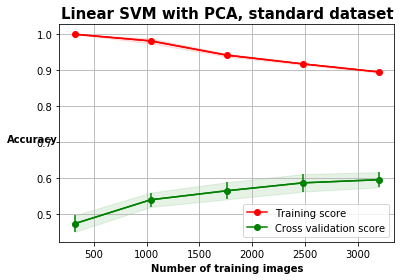

In [50]:
kfold10 = KFold(n_splits=10)
plot_learning_curve_accuracy(clfPCA, "Linear SVM with PCA, standard dataset", X_allPCA, y_allPCA, ylim=None, cv=kfold10, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))

ids: 0
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 1
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 2
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 3
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 4
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 5
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 6
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9
ids: 7
idt: 0
idt: 1
idt: 2
idt: 3
idt: 4
idt: 5
idt: 6
idt: 7
idt: 8
idt: 9


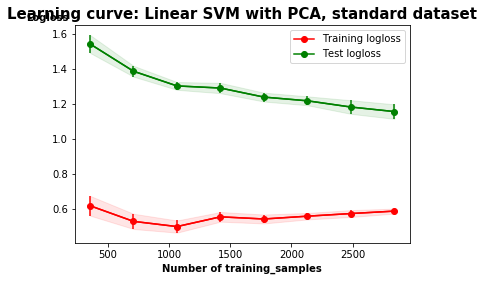

In [51]:
total_samples = len(train_dataPCA)
train_samples = np.arange(start=total_samples//10,stop=4*total_samples//5+1,step=total_samples//10)
validation_samples = total_samples//5

train_errors = np.empty((len(train_samples), 10))
validation_errors = np.empty((len(train_samples), 10))

for ids in range(len(train_samples)):
    s = train_samples[ids]
    print("ids: " + str(ids))
    for idt in range(10):
        perm = np.random.permutation(total_samples)
        x_train = [train_dataPCA[i] for i in perm[:s]]
        Y_train = train_labelsPCA[perm[:s]]
        x_validation = [train_dataPCA[i] for i in perm[s:s+validation_samples]]   
        y_validation = train_labelsPCA[perm[s:s+validation_samples]]
        clf2 = svm.SVC(kernel='linear', C = 1.0, probability=True)
        clf2.fit(x_train, Y_train)
        pred_train = clf2.predict_proba(x_train)
        pred_val = clf2.predict_proba(x_validation)
        train_errors[ids,idt] = sklearn.metrics.log_loss(Y_train, pred_train)
        validation_errors[ids,idt] = sklearn.metrics.log_loss(y_validation, pred_val)
        print("idt: " + str(idt))
        
train_mean = np.mean(train_errors, axis = 1)        
validation_mean = np.mean(validation_errors, axis = 1)        
train_std = np.std(train_errors, axis = 1)        
validation_std = np.std(validation_errors, axis = 1)        

plt.figure()
plt.errorbar(train_samples, train_mean, yerr=train_std, color = 'r', ecolor = 'r')
plt.errorbar(train_samples, validation_mean, yerr=validation_std, color = 'g', 
             ecolor = 'g')
plt.grid()
plt.fill_between(train_samples, train_mean - train_std,
                 train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_samples, validation_mean - validation_std,
                 validation_mean + validation_std, alpha=0.1, color="g")
titlepar = {'weight' : 'bold',
        'size' : '15'}
ypara = {'weight' : 'bold',
         'rotation' : '0'}
xpara = {'weight' : 'bold'}
plt.grid()
plt.title("Learning curve: Linear SVM with PCA, standard dataset",**titlepar)
plt.xlabel("Number of training_samples", **xpara)
plt.ylabel("Logloss", **ypara).set_position([-1.5, 1.01])
plt.plot(train_samples, train_mean, 'o-', color="r",
             label="Training logloss")
plt.plot(train_samples, validation_mean, 'o-', color="g",
         label="Test logloss")
plt.legend(loc="best")
plt.show()


TypeError: fit() missing 1 required positional argument: 'y'

<IPython.core.display.Javascript object>


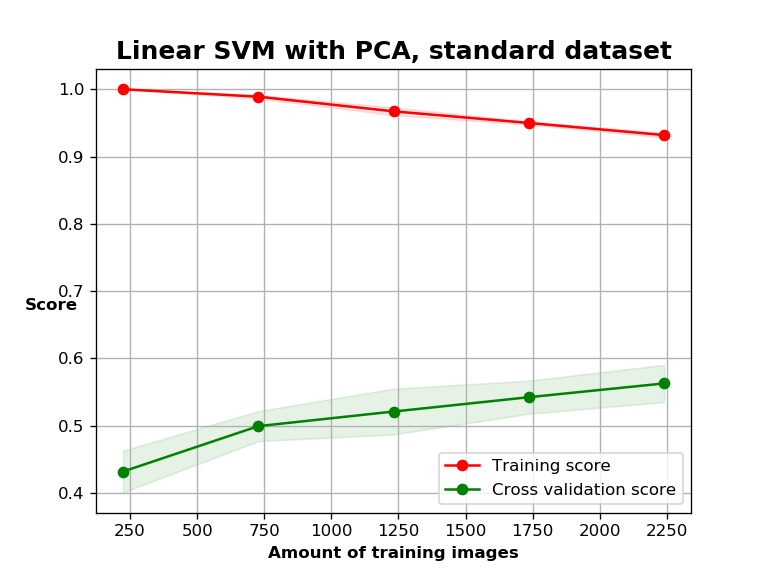

<module 'matplotlib.pyplot' from 'C:\\Users\\Sander Blomme\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

<IPython.core.display.Javascript object>


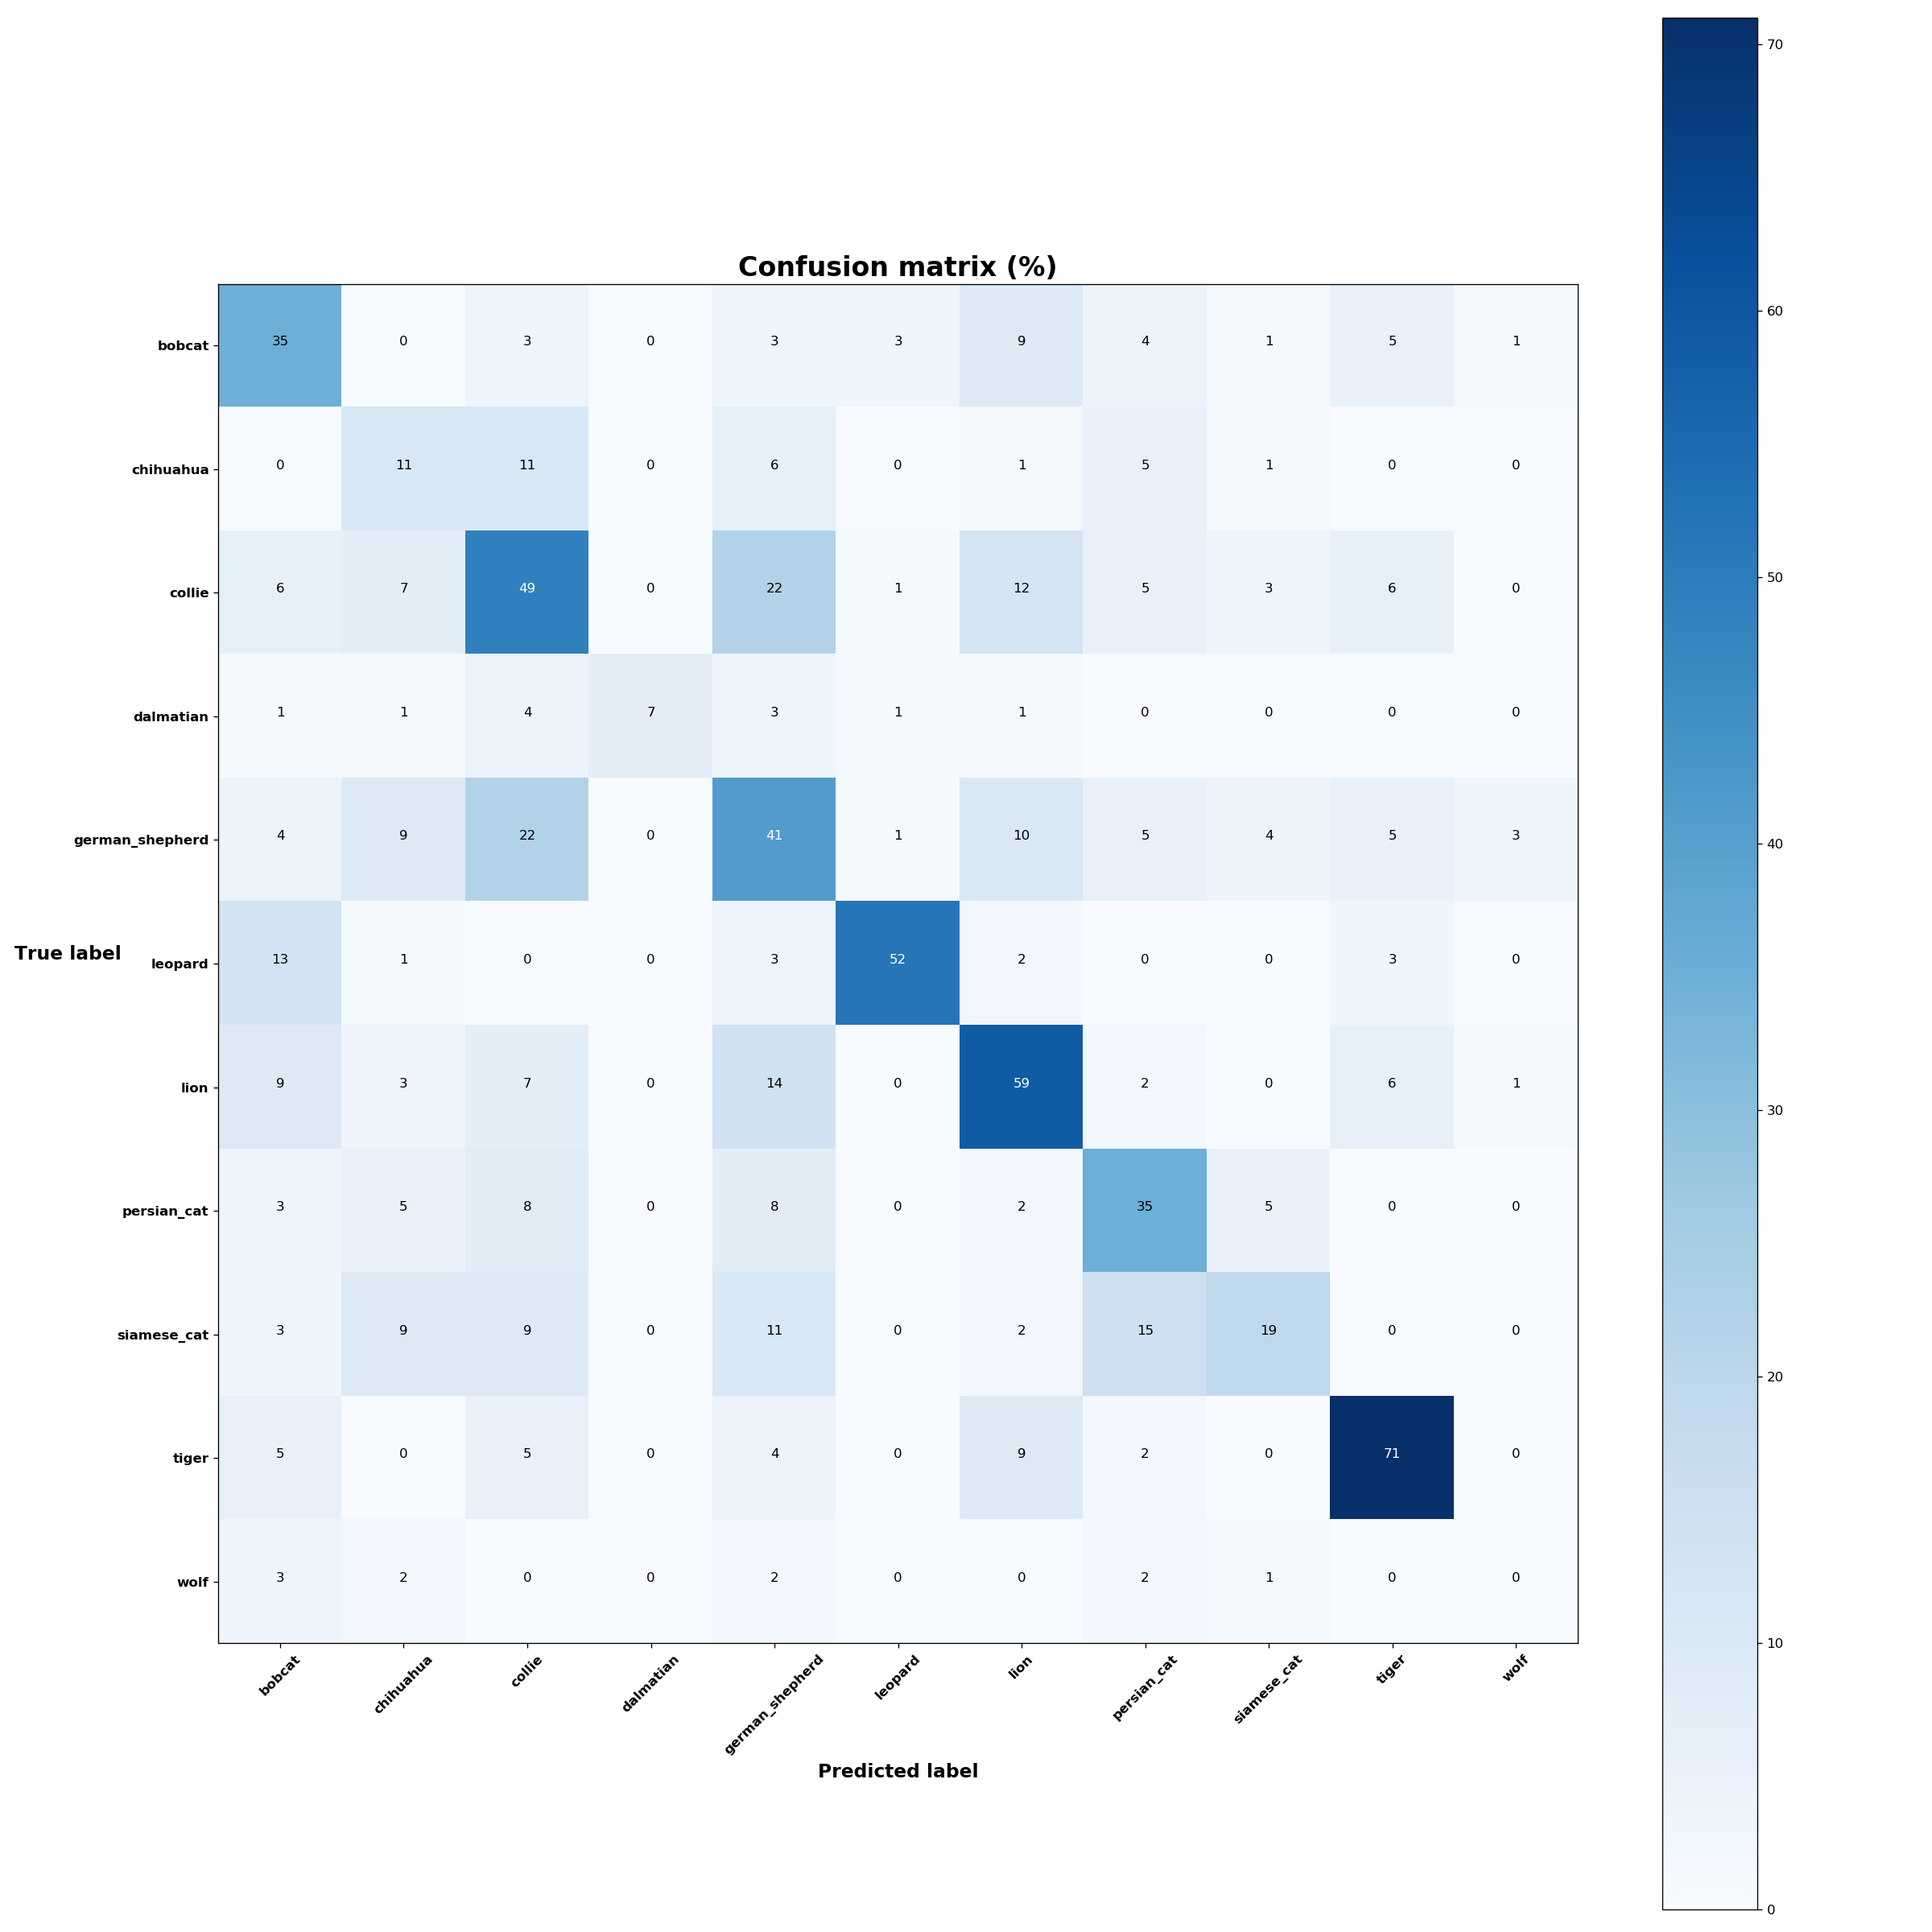

Confusion matrix, without normalization


<IPython.core.display.Javascript object>


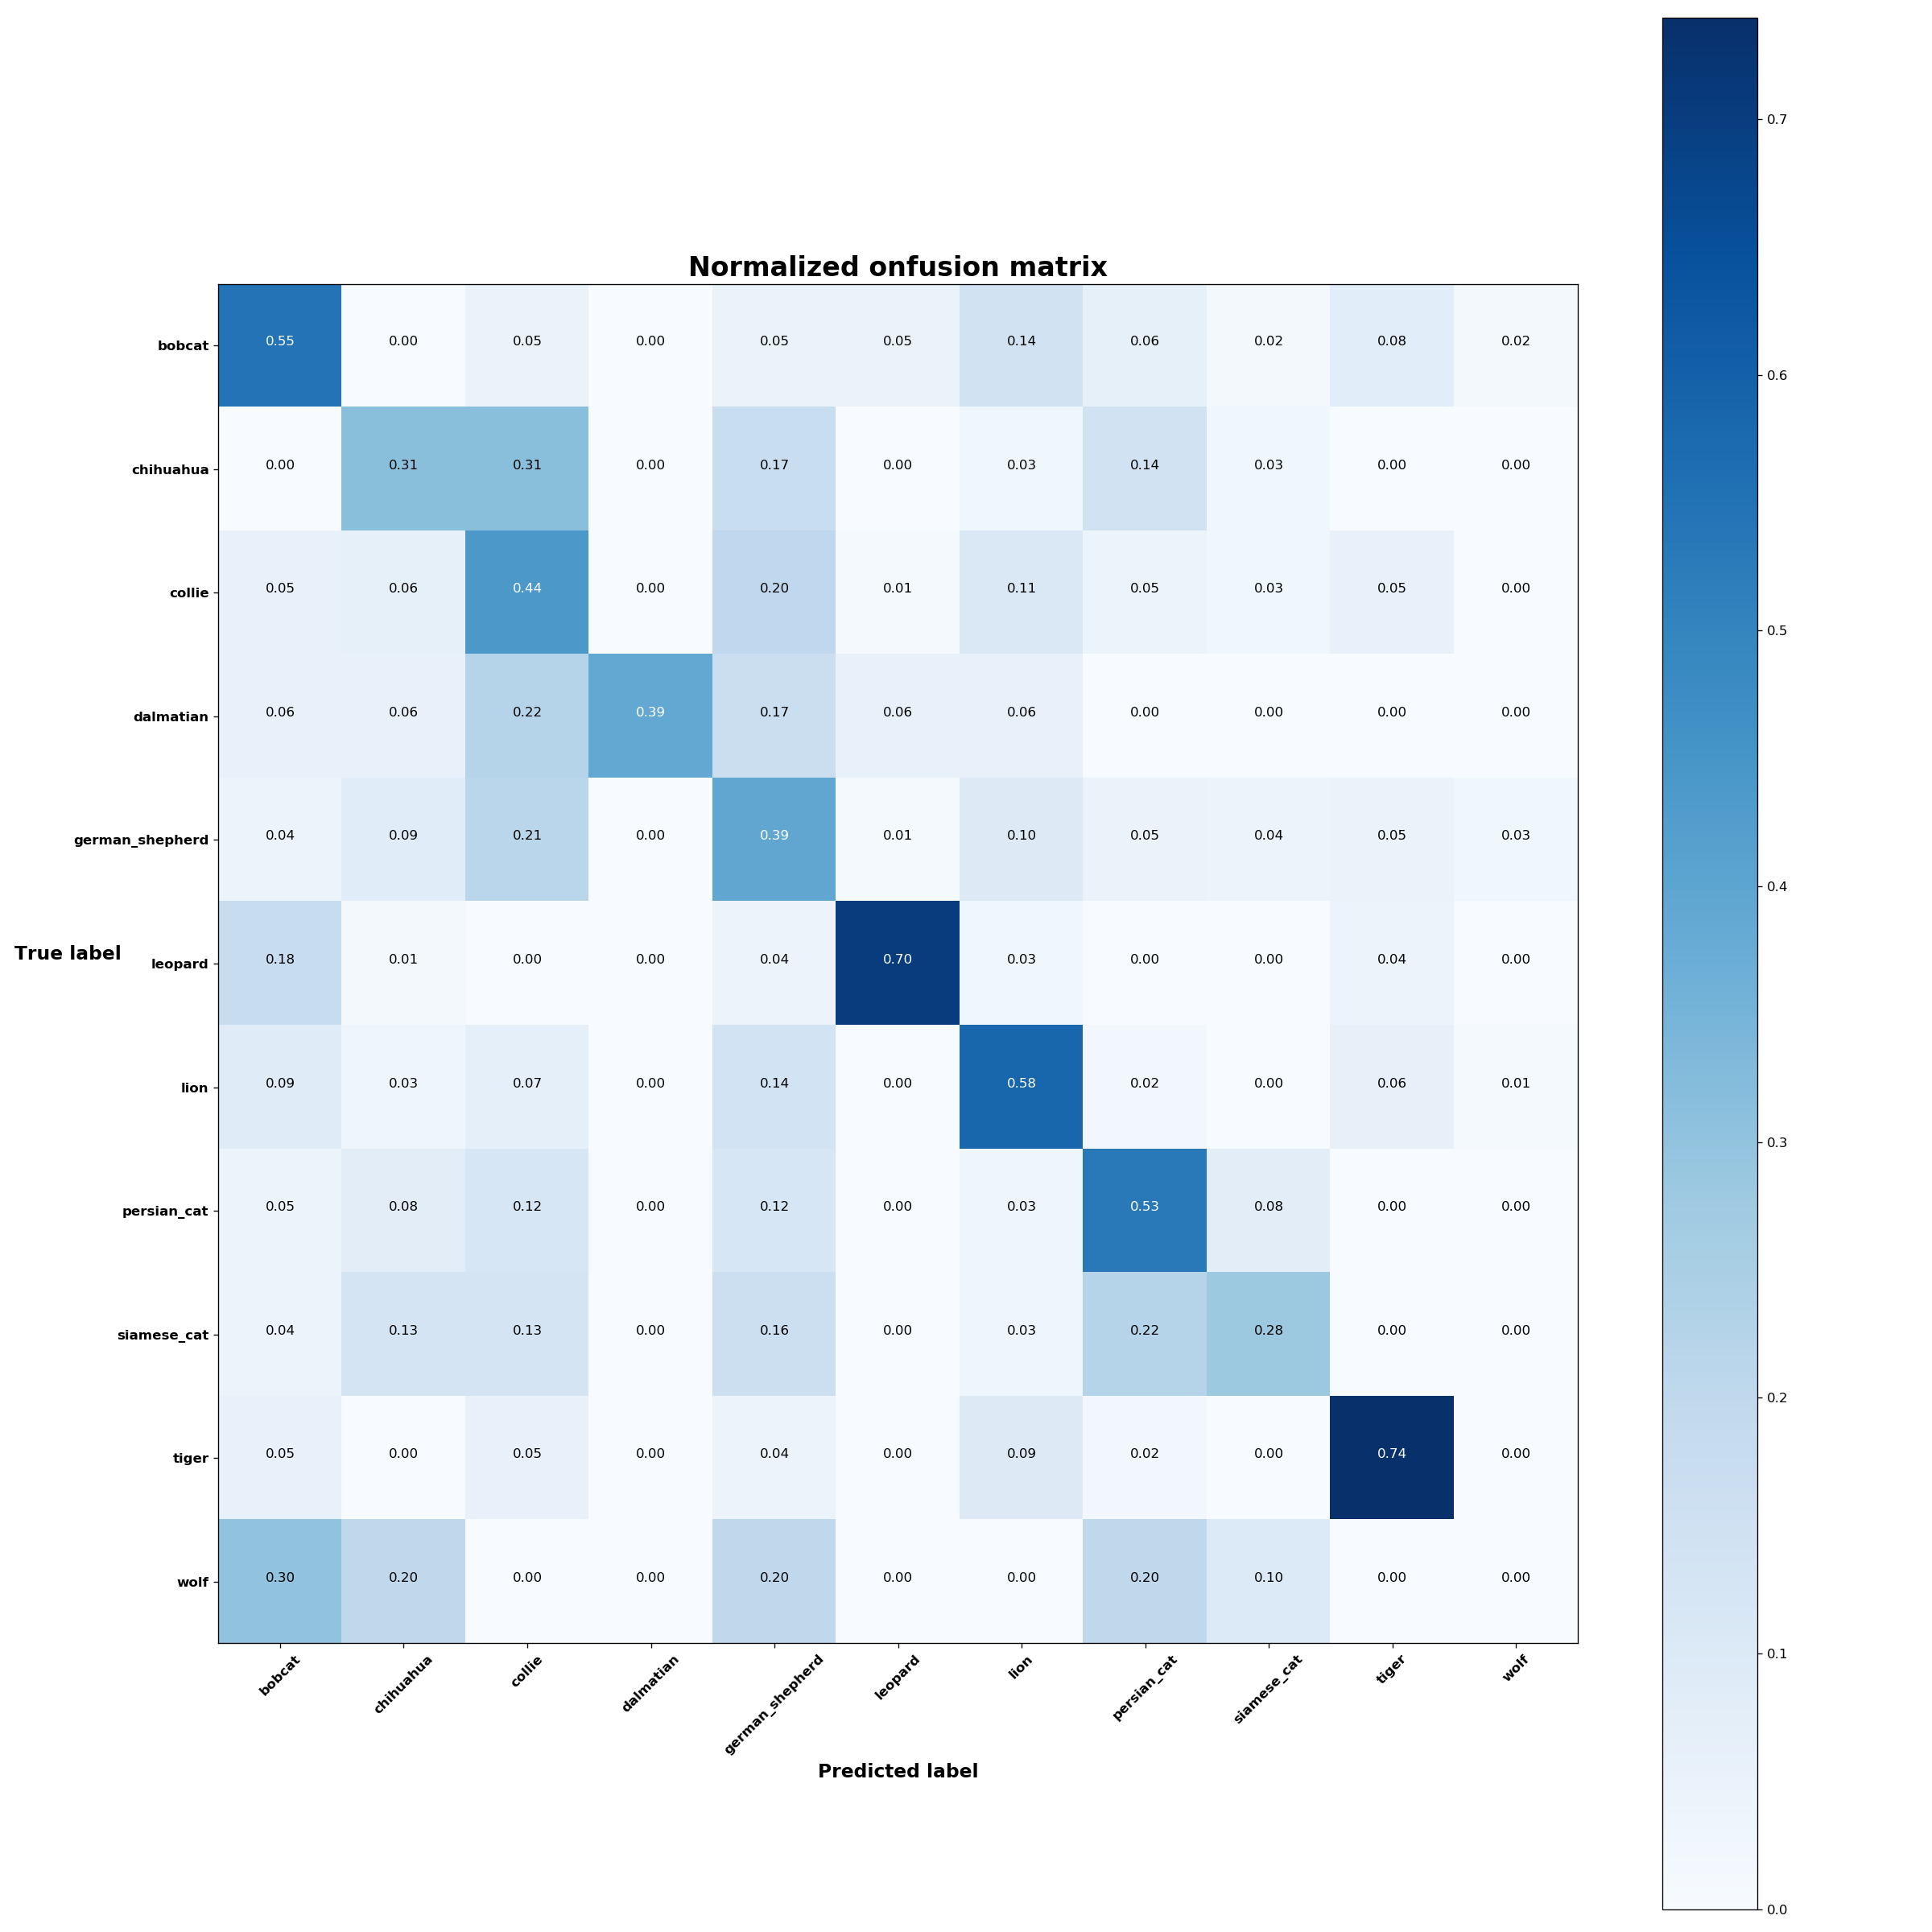

Normalized confusion matrix


{'bobcat': [56, 57, 70, 72, 76, 77, 80, 100, 119, 126, 138, 140, 160, 161, 162, 179, 195, 205, 207, 209, 210, 211, 230, 246, 257, 258, 272, 274, 291, 306], 'chihuahua': [6, 8, 12, 15, 20, 21, 28, 40, 42, 46, 56, 57, 59, 71, 72, 91, 104, 116, 125, 135, 148, 151, 152, 161, 162, 163, 171, 172, 178, 179, 189, 191], 'collie': [19, 34, 35, 50, 51, 67, 72, 74, 81, 85, 86, 87, 102, 105, 109, 119, 123, 137, 148, 155, 160, 175, 191, 195, 200, 202, 209, 218, 222, 224, 229, 242, 243, 251, 252, 261, 264, 307, 308, 312, 316, 321, 330, 342, 345, 363, 373, 399, 403, 405, 408, 422, 429, 443, 445], 'dalmatian': [1, 5, 18, 21, 23, 24, 31, 34, 42, 54, 58, 60, 61, 64, 65, 66, 67, 74, 77, 79], 'german_shepherd': [5, 6, 20, 24, 34, 56, 63, 66, 71, 73, 80, 81, 83, 88, 103, 105, 107, 112, 121, 125, 127, 132, 134, 139, 142, 143, 168, 177, 180, 183, 196, 202, 204, 213, 219, 225, 228, 235, 236, 243, 251, 252, 257, 260, 263, 266, 275, 286, 287, 288, 294, 297, 300, 302, 305, 308, 309, 323, 329, 355, 368, 372, 380, 

'=paths to all training images'

['test_0001.jpg', 'test_0002.jpg', 'test_0003.jpg', 'test_0004.jpg', 'test_0005.jpg', 'test_0006.jpg', 'test_0007.jpg', 'test_0008.jpg', 'test_0009.jpg', 'test_0010.jpg', 'test_0011.jpg', 'test_0012.jpg', 'test_0013.jpg', 'test_0014.jpg', 'test_0015.jpg', 'test_0016.jpg', 'test_0017.jpg', 'test_0018.jpg', 'test_0019.jpg', 'test_0020.jpg', 'test_0021.jpg', 'test_0022.jpg', 'test_0023.jpg', 'test_0024.jpg', 'test_0025.jpg', 'test_0026.jpg', 'test_0027.jpg', 'test_0028.jpg', 'test_0029.jpg', 'test_0030.jpg', 'test_0031.jpg', 'test_0032.jpg', 'test_0033.jpg', 'test_0034.jpg', 'test_0035.jpg', 'test_0036.jpg', 'test_0037.jpg', 'test_0038.jpg', 'test_0039.jpg', 'test_0040.jpg', 'test_0041.jpg', 'test_0042.jpg', 'test_0043.jpg', 'test_0044.jpg', 'test_0045.jpg', 'test_0046.jpg', 'test_0047.jpg', 'test_0048.jpg', 'test_0049.jpg', 'test_0050.jpg', 'test_0051.jpg', 'test_0052.jpg', 'test_0053.jpg', 'test_0054.jpg', 'test_0055.jpg', 'test_0056.jpg', 'test_0057.jpg', 'test_0058.jpg', 'test_0059.jp


E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0001.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0002.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0003.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0004.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0005.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0006.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0007.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0008.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0143.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0144.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0145.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0146.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0147.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0148.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0149.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0150.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0285.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0286.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0287.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0288.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0289.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0290.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0291.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0292.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0427.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0428.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0429.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0430.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0431.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0432.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0433.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0434.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0569.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0570.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0571.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0572.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0573.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0574.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0575.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0576.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0711.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0712.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0713.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0714.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0715.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0716.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0717.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0718.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0853.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0854.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0855.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0856.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0857.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0858.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0859.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0860.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0995.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0996.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0997.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0998.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_0999.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1000.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1001.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1002.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1137.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1138.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1139.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1140.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1141.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1142.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1143.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1144.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1279.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1280.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1281.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1282.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1283.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1284.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1285.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1286.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1421.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1422.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1423.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1424.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1425.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1426.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1427.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1428.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1563.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1564.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1565.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1566.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1567.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1568.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1569.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1570.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1705.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1706.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1707.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1708.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1709.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1710.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1711.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1712.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1847.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1848.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1849.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1850.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1851.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1852.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1853.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1854.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1989.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1990.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1991.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1992.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1993.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1994.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1995.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_1996.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2131.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2132.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2133.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2134.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2135.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2136.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2137.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2138.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2273.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2274.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2275.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2276.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2277.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2278.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2279.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2280.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2415.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2416.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2417.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2418.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2419.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2420.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2421.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2422.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2557.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2558.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2559.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2560.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2561.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2562.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2563.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2564.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2699.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2700.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2701.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2702.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2703.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2704.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2705.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2706.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2841.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2842.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2843.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2844.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2845.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2846.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2847.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2848.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2983.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2984.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2985.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2986.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2987.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2988.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2989.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_2990.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3125.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3126.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3127.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3128.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3129.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3130.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3131.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3132.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3267.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3268.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3269.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3270.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3271.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3272.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3273.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3274.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3409.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3410.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3411.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3412.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3413.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3414.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3415.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 2\Data\test\test_3416.jpg
E:\Allerlei\Sander\Andere\School\Universiteit\Master\Machine Learning\Competition\Phase 

{'bobcat': 285,
 'chihuahua': 165,
 'collie': 403,
 'dalmatian': 61,
 'german_shepherd': 427,
 'leopard': 316,
 'lion': 395,
 'persian_cat': 321,
 'siamese_cat': 230,
 'tiger': 423,
 'wolf': 52}

279.8181818181818

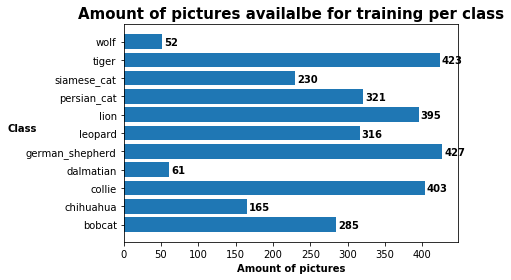

In [30]:
showAmountOfPicturesAvailalbeForTrainingPerClass(label_stringsAug, train_pathsAug)

[(685, 1024, 3),
 (1024, 683, 3),
 (665, 1024, 3),
 (1024, 682, 3),
 (768, 1024, 3),
 (678, 1024, 3),
 (829, 1024, 3),
 (821, 1024, 3),
 (1024, 682, 3),
 (964, 1024, 3),
 (862, 1024, 3),
 (1024, 682, 3),
 (768, 1024, 3),
 (683, 1024, 3),
 (768, 1024, 3),
 (681, 1024, 3),
 (767, 1024, 3),
 (678, 1024, 3),
 (333, 500, 3),
 (683, 1024, 3),
 (995, 1024, 3),
 (683, 1024, 3),
 (1024, 768, 3),
 (1024, 682, 3),
 (681, 1024, 3),
 (768, 1024, 3),
 (652, 1024, 3),
 (760, 586, 3),
 (720, 1024, 3),
 (576, 1024, 3),
 (683, 1024, 3),
 (768, 1024, 3),
 (1024, 683, 3),
 (1024, 683, 3),
 (1024, 682, 3),
 (1024, 629, 3),
 (1024, 768, 3),
 (683, 1024, 3),
 (682, 1024, 3),
 (684, 1024, 3),
 (800, 450, 3),
 (683, 1024, 3),
 (683, 1024, 3),
 (375, 500, 3),
 (683, 1024, 3),
 (683, 1024, 3),
 (486, 748, 3),
 (1024, 682, 3),
 (685, 1024, 3),
 (1024, 930, 3),
 (767, 1024, 3),
 (683, 1024, 3),
 (595, 960, 3),
 (768, 1024, 3),
 (683, 1024, 3),
 (683, 1024, 3),
 (1024, 681, 3),
 (768, 1024, 3),
 (680, 1024, 3),
 (6

[701440,
 699392,
 680960,
 698368,
 786432,
 694272,
 848896,
 840704,
 698368,
 987136,
 882688,
 698368,
 786432,
 699392,
 786432,
 697344,
 785408,
 694272,
 166500,
 699392,
 1018880,
 699392,
 786432,
 698368,
 697344,
 786432,
 667648,
 445360,
 737280,
 589824,
 699392,
 786432,
 699392,
 699392,
 698368,
 644096,
 786432,
 699392,
 698368,
 700416,
 360000,
 699392,
 699392,
 187500,
 699392,
 699392,
 363528,
 698368,
 701440,
 952320,
 785408,
 699392,
 571200,
 786432,
 699392,
 699392,
 697344,
 786432,
 696320,
 699392,
 699392,
 890880,
 1048576,
 809984,
 699392,
 786432,
 697344,
 786432,
 187500,
 232000,
 698368,
 699392,
 696320,
 698368,
 699392,
 187500,
 807936,
 698368,
 786432,
 699392,
 698368,
 187500,
 698368,
 699392,
 588800,
 694272,
 699392,
 699392,
 794624,
 698368,
 693248,
 699392,
 182000,
 236000,
 786432,
 696320,
 699392,
 786432,
 1014784,
 166500,
 698368,
 827392,
 786432,
 699392,
 612352,
 697344,
 786432,
 699392,
 698368,
 187500,
 699392

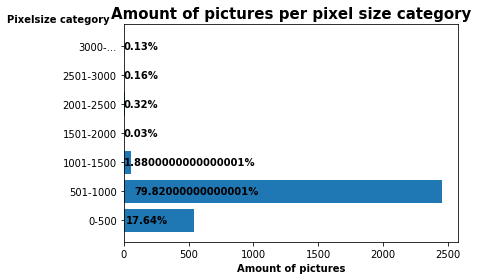

In [33]:
showAmountOfPicturesPerPixelSizeCategory(label_stringsAug, train_pathsAug)

3078